# STEP #1 IMPORTING DATA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
# create dataframes from training and testing datasets 
chicago_df_1 = pd.read_csv(r"C:\Users\sonam\OneDrive\Desktop\DeepLearningPacticalWorkout\DL and ML Practical Tutorials - Package\Project 3\Chicago_Crimes_2005_to_2007.csv", error_bad_lines=False)
chicago_df_2 = pd.read_csv(r"C:\Users\sonam\OneDrive\Desktop\DeepLearningPacticalWorkout\DL and ML Practical Tutorials - Package\Project 3\Chicago_Crimes_2008_to_2011.csv", error_bad_lines=False)
chicago_df_3 = pd.read_csv(r"C:\Users\sonam\OneDrive\Desktop\DeepLearningPacticalWorkout\DL and ML Practical Tutorials - Package\Project 3\Chicago_Crimes_2012_to_2017.csv", error_bad_lines=False)

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [3]:
# group the above three dataframes into one
chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3], ignore_index=False, axis=0)

# STEP #2 EXPLORING DATASET

In [4]:
# observe the first few lines the dataframe 
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [5]:
# observe the last few raws of the dataframe
chicago_df.tail(20)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456694,6246478,10508650,HZ250022,05/03/2016 05:00:00 PM,078XX S MARSHFIELD AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,...,17.0,71.0,03,1166708.0,1852625.0,2016,05/10/2016 03:56:50 PM,41.751166,-87.664670,"(41.751166357, -87.664670209)"
1456695,6246521,10508653,HZ250512,05/03/2016 11:58:00 PM,026XX W LE MOYNE ST,0520,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENTIAL YARD (FRONT/BACK),True,...,26.0,24.0,04A,1158381.0,1909870.0,2016,05/10/2016 03:56:50 PM,41.908427,-87.693623,"(41.908426978, -87.693622615)"
1456696,6247563,10508656,HZ250476,05/03/2016 03:15:00 PM,014XX N OGDEN AVE,1720,OFFENSE INVOLVING CHILDREN,CONTRIBUTE DELINQUENCY OF A CHILD,STREET,False,...,27.0,8.0,20,1171322.0,1909588.0,2016,05/10/2016 03:56:50 PM,41.907378,-87.646092,"(41.907378476, -87.64609233)"
1456697,6247798,10508658,HZ250506,05/03/2016 11:50:00 PM,018XX S KEDZIE AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,...,24.0,29.0,26,1155317.0,1890928.0,2016,05/10/2016 03:56:50 PM,41.856510,-87.705387,"(41.856510401, -87.705387422)"
1456698,6248016,10508659,HZ250499,05/03/2016 11:38:00 PM,038XX S PRINCETON AVE,0460,BATTERY,SIMPLE,CHA PARKING LOT/GROUNDS,False,...,3.0,34.0,08B,1174922.0,1879297.0,2016,05/10/2016 03:56:50 PM,41.824178,-87.633775,"(41.82417802, -87.6337748)"
1456699,6248192,10508661,HZ250344,05/03/2016 08:44:00 PM,070XX S WABASH AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,...,6.0,69.0,04B,1177941.0,1858411.0,2016,05/10/2016 03:56:50 PM,41.766797,-87.623332,"(41.766796861, -87.623332025)"
1456700,6248278,10508662,HZ250477,05/03/2016 08:00:00 AM,057XX S MICHIGAN AVE,5001,OTHER OFFENSE,OTHER CRIME INVOLVING PROPERTY,APARTMENT,False,...,20.0,40.0,26,1178135.0,1867058.0,2016,05/10/2016 03:56:50 PM,41.790521,-87.622359,"(41.790520722, -87.622358898)"
1456701,6248713,10508663,HZ250466,05/03/2016 10:10:00 PM,033XX W MARQUETTE RD,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,False,...,15.0,66.0,17,1155359.0,1859995.0,2016,05/10/2016 03:56:50 PM,41.771625,-87.706062,"(41.771625308, -87.706062047)"
1456702,6248779,10508664,HZ250486,05/03/2016 11:35:00 PM,083XX S CARPENTER ST,0560,ASSAULT,SIMPLE,RESIDENCE,True,...,21.0,71.0,08A,1170770.0,1849485.0,2016,05/10/2016 03:56:50 PM,41.742462,-87.649876,"(41.742462184, -87.649876395)"
1456703,6248999,10508665,HZ250448,05/03/2016 10:15:00 PM,095XX S LOOMIS ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,...,21.0,73.0,14,1168707.0,1841343.0,2016,05/10/2016 03:56:50 PM,41.720164,-87.657669,"(41.720164061, -87.657669427)"


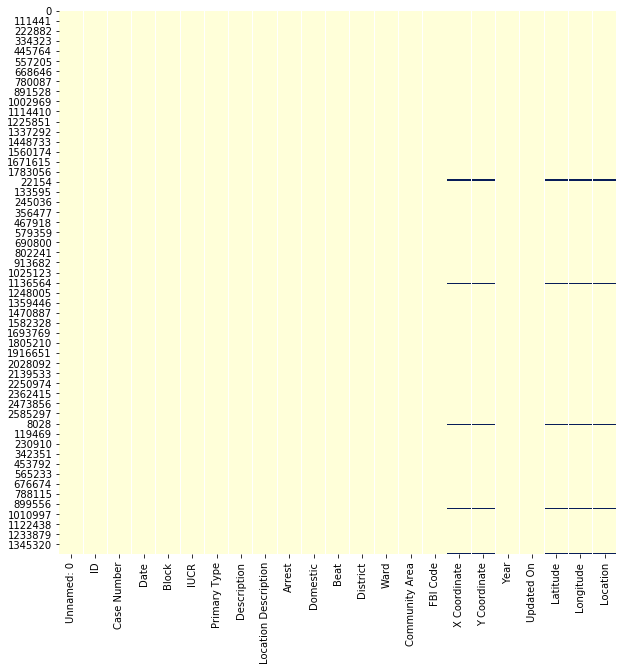

In [6]:
# raws and columns containing undefined values
plt.figure(figsize=(10, 10))
sns.heatmap(chicago_df.isnull(), cbar=False, cmap='YlGnBu')

In [7]:
# remove the columns with more undefined values or NA values
chicago_df.drop(['Unnamed: 0', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Year', 'FBI Code', 'Beat', 'Ward', 'Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [8]:
chicago_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4673626,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,4673627,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,4673628,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,4673629,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,4673630,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
5,4673631,03/30/2006 10:30:00 PM,014XX W 73RD PL,ASSAULT,SIMPLE,APARTMENT,True,False
6,4673632,04/05/2006 12:10:00 PM,050XX N LARAMIE AVE,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,False
7,4673633,04/05/2006 03:00:00 PM,067XX S ROCKWELL ST,THEFT,$500 AND UNDER,STREET,False,False
8,4673634,04/05/2006 09:30:00 PM,019XX W CHICAGO AVE,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,False
9,4673635,04/03/2006 03:00:00 AM,063XX S EBERHART AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True


In [9]:
# change the date and time format from MM/DD/YYYY H:M:S to YYYY-MM-DD H:M:S
chicago_df.Date = pd.to_datetime(chicago_df.Date, format='%m/%d/%Y %I:%M:%S %p')

In [10]:
chicago_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,4673628,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,4673629,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,4673630,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
5,4673631,2006-03-30 22:30:00,014XX W 73RD PL,ASSAULT,SIMPLE,APARTMENT,True,False
6,4673632,2006-04-05 12:10:00,050XX N LARAMIE AVE,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,False
7,4673633,2006-04-05 15:00:00,067XX S ROCKWELL ST,THEFT,$500 AND UNDER,STREET,False,False
8,4673634,2006-04-05 21:30:00,019XX W CHICAGO AVE,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,False
9,4673635,2006-04-03 03:00:00,063XX S EBERHART AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True


In [11]:
# choose index from dataframe columns
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [12]:
# Make sure the date column is the dataframe index
chicago_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
2006-03-30 22:30:00,4673631,2006-03-30 22:30:00,014XX W 73RD PL,ASSAULT,SIMPLE,APARTMENT,True,False
2006-04-05 12:10:00,4673632,2006-04-05 12:10:00,050XX N LARAMIE AVE,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,False
2006-04-05 15:00:00,4673633,2006-04-05 15:00:00,067XX S ROCKWELL ST,THEFT,$500 AND UNDER,STREET,False,False
2006-04-05 21:30:00,4673634,2006-04-05 21:30:00,019XX W CHICAGO AVE,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,False


In [13]:
# frequency of occurrence of crimes by type
chicago_df["Primary Type"].value_counts()

THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                5879
KIDNAPPING

In [14]:
# The first fifteen crime types 
chicago_df["Primary Type"].value_counts().iloc[:15].index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BURGLARY',
       'OTHER OFFENSE', 'ASSAULT', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'PROSTITUTION',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN'],
      dtype='object')

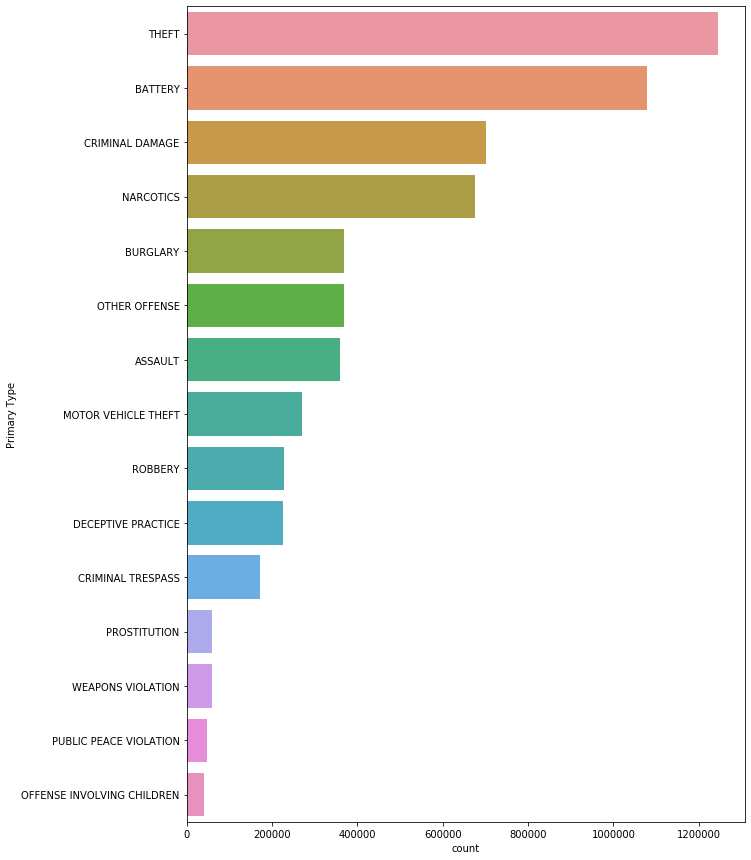

In [15]:
# visualization of those fifteen crime types 
plt.figure(figsize=(10,15))
sns.countplot(y='Primary Type', data=chicago_df, order=chicago_df["Primary Type"].value_counts().iloc[:15].index)

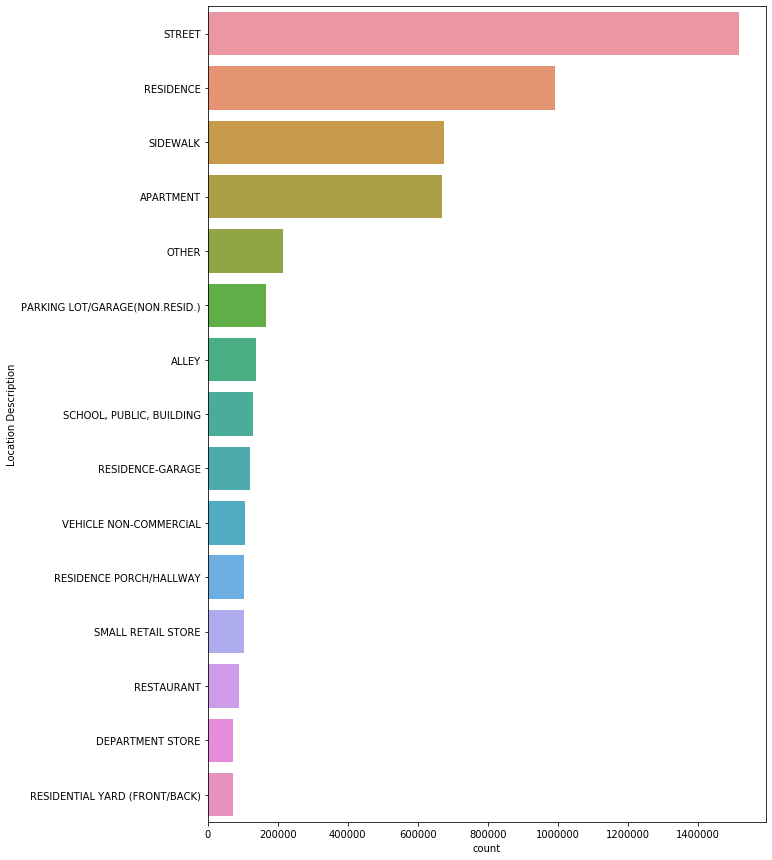

In [16]:
# Visualization of the above fifteen crimes by location description
plt.figure(figsize=(10,15))
sns.countplot(y='Location Description', data=chicago_df, order=chicago_df["Location Description"].value_counts().iloc[:15].index)

In [17]:
# crime frequency by date
chicago_df.resample("Y").size()

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

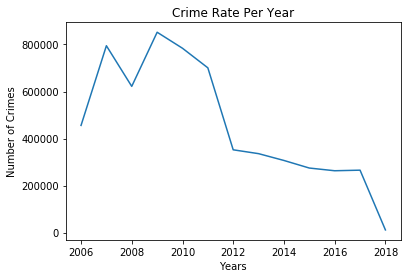

In [18]:
# visualization of number of crimes commited yearly 
plt.plot(chicago_df.resample("Y").size())
plt.title("Crime Rate Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

In [19]:
# Crime frequency per month
chicago_df.resample("M").size()

Date
2005-01-31    33983
2005-02-28    32042
2005-03-31    36970
2005-04-30    38963
2005-05-31    40572
2005-06-30    40234
2005-07-31    41976
2005-08-31    41741
2005-09-30    39833
2005-10-31    40204
2005-11-30    36244
2005-12-31    33049
2006-01-31    37605
2006-02-28    34063
2006-03-31    43721
2006-04-30    69128
2006-05-31    79013
2006-06-30    77348
2006-07-31    82750
2006-08-31    80628
2006-09-30    75045
2006-10-31    76870
2006-11-30    70710
2006-12-31    67803
2007-01-31    67123
2007-02-28    53811
2007-03-31    71857
2007-04-30    70389
2007-05-31    78170
2007-06-30    55802
              ...  
2014-08-31    25802
2014-09-30    23811
2014-10-31    23911
2014-11-30    20680
2014-12-31    20891
2015-01-31    20656
2015-02-28    16287
2015-03-31    21560
2015-04-30    21610
2015-05-31    23570
2015-06-30    23059
2015-07-31    24101
2015-08-31    24685
2015-09-30    22996
2015-10-31    22979
2015-11-30    20486
2015-12-31    21006
2016-01-31    20375
2016-02-29    1

Text(0, 0.5, 'Number of Crimes')

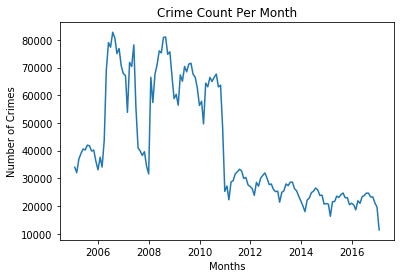

In [20]:
plt.plot(chicago_df.resample('M').size())
plt.title("Crime Count Per Month")
plt.xlabel("Months")
plt.ylabel("Number of Crimes")

In [21]:
# frequency of crime per quarter
chicago_df.resample('Q').size()

Date
2005-03-31    102995
2005-06-30    119769
2005-09-30    123550
2005-12-31    109497
2006-03-31    115389
2006-06-30    225489
2006-09-30    238423
2006-12-31    215383
2007-03-31    192791
2007-06-30    204361
2007-09-30    119086
2007-12-31    105610
2008-03-31    191523
2008-06-30    222331
2008-09-30    236695
2008-12-31    201504
2009-03-31    184055
2009-06-30    203916
2009-09-30    210446
2009-12-31    185483
2010-03-31    171848
2010-06-30    194453
2010-09-30    197116
2010-12-31    137274
2011-03-31     78167
2011-06-30     93064
2011-09-30     95835
2011-12-31     85000
2012-03-31     78574
2012-06-30     88283
2012-09-30     89685
2012-12-31     79128
2013-03-31     71651
2013-06-30     80776
2013-09-30     83510
2013-12-31     70766
2014-03-31     59964
2014-06-30     72991
2014-09-30     76090
2014-12-31     65482
2015-03-31     58503
2015-06-30     68239
2015-09-30     71782
2015-12-31     64471
2016-03-31     60843
2016-06-30     68085
2016-09-30     72500
2016-12-

Text(0, 0.5, 'Number Of Crimes')

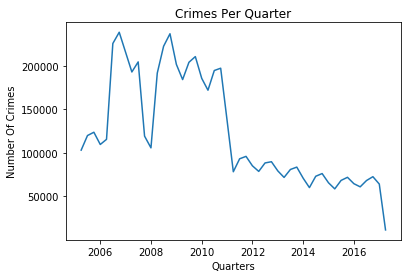

In [22]:
# Resample is a convinient method for frequency conversion and resampling of time series
plt.plot(chicago_df.resample('Q').size())
plt.title("Crimes Per Quarter")
plt.xlabel("Quarters")
plt.ylabel("Number Of Crimes")

# STEP #3 PREPARING THE DATA

In [23]:
# daily crime frequency per month
chicago_prophet = chicago_df.resample("M").size().reset_index()

In [24]:
chicago_prophet

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
5,2005-06-30,40234
6,2005-07-31,41976
7,2005-08-31,41741
8,2005-09-30,39833
9,2005-10-31,40204


In [25]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [26]:
chicago_prophet

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
5,2005-06-30,40234
6,2005-07-31,41976
7,2005-08-31,41741
8,2005-09-30,39833
9,2005-10-31,40204


In [28]:

chicago_prophet_df = pd.DataFrame(chicago_prophet)

In [29]:
chicago_prophet_df

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
5,2005-06-30,40234
6,2005-07-31,41976
7,2005-08-31,41741
8,2005-09-30,39833
9,2005-10-31,40204


# STEP #4 MAKE PREDICTIONS

In [30]:
chicago_prophet_df.columns

Index(['Date', 'Crime Count'], dtype='object')

In [39]:
chicago_prophet_df_final = chicago_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})

In [40]:
chicago_prophet_df_final

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
5,2005-06-30,40234
6,2005-07-31,41976
7,2005-08-31,41741
8,2005-09-30,39833
9,2005-10-31,40204


In [41]:
m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\sonam\Anaconda3\envs\tf\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [43]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [44]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60454.773642,38781.889333,72952.257366,60454.773642,60454.773642,-4762.404217,-4762.404217,-4762.404217,-4762.404217,-4762.404217,-4762.404217,0.0,0.0,0.0,55692.369426
1,2005-02-28,60322.370911,34603.309131,67052.690179,60322.370911,60322.370911,-9500.516358,-9500.516358,-9500.516358,-9500.516358,-9500.516358,-9500.516358,0.0,0.0,0.0,50821.854553
2,2005-03-31,60175.782173,41649.833376,75838.015542,60175.782173,60175.782173,-1224.151952,-1224.151952,-1224.151952,-1224.151952,-1224.151952,-1224.151952,0.0,0.0,0.0,58951.630221
3,2005-04-30,60033.922104,44243.422011,77274.325603,60033.922104,60033.922104,1182.829000,1182.829000,1182.829000,1182.829000,1182.829000,1182.829000,0.0,0.0,0.0,61216.751104
4,2005-05-31,59887.333366,49357.028997,82681.624274,59887.333366,59887.333366,5498.247964,5498.247964,5498.247964,5498.247964,5498.247964,5498.247964,0.0,0.0,0.0,65385.581330
5,2005-06-30,59745.473296,46652.960259,81141.366609,59745.473296,59745.473296,3576.966082,3576.966082,3576.966082,3576.966082,3576.966082,3576.966082,0.0,0.0,0.0,63322.439378
6,2005-07-31,59598.884555,47204.504915,81433.562957,59598.884555,59598.884555,4582.849351,4582.849351,4582.849351,4582.849351,4582.849351,4582.849351,0.0,0.0,0.0,64181.733907
7,2005-08-31,59452.295814,47497.028903,79900.917318,59452.295814,59452.295814,4498.965423,4498.965423,4498.965423,4498.965423,4498.965423,4498.965423,0.0,0.0,0.0,63951.261237
8,2005-09-30,59310.435742,44464.758353,79461.957448,59310.435742,59310.435742,1749.360219,1749.360219,1749.360219,1749.360219,1749.360219,1749.360219,0.0,0.0,0.0,61059.795961
9,2005-10-31,59163.847001,45195.370543,77485.414729,59163.847001,59163.847001,2397.444549,2397.444549,2397.444549,2397.444549,2397.444549,2397.444549,0.0,0.0,0.0,61561.291550


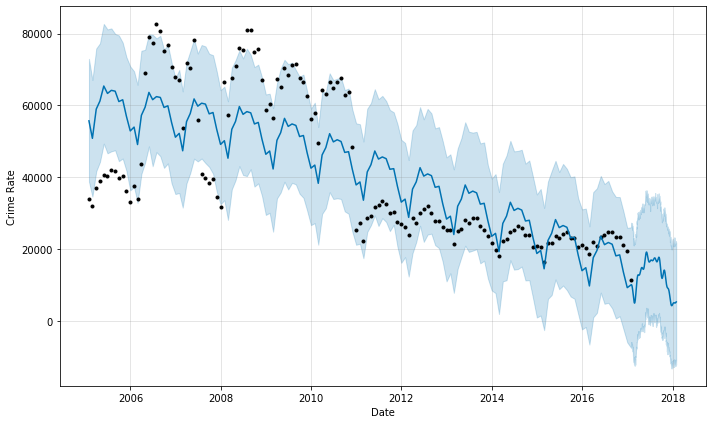

In [45]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

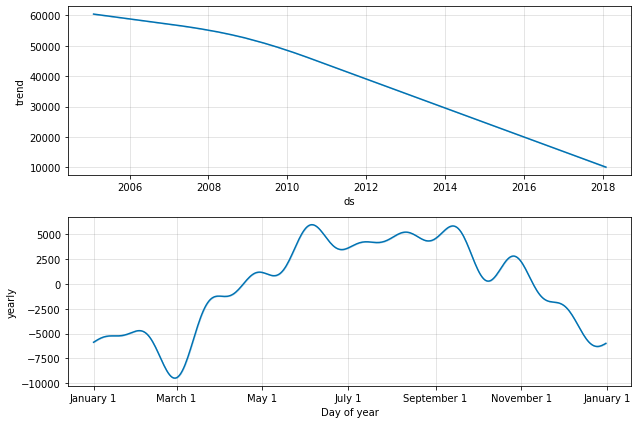

In [46]:
figure3 = m.plot_components(forecast)

# GREAT JOB KEEP UP THE GREAT WORK!!!